In [32]:
import os
import time
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# Load data
# https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction
# https://datadryad.org/stash/dataset/doi:10.5061/dryad.0p2ngf1zd

health_data = pd.read_csv('./data/data01.csv')
health_data

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900000,16.220000,7.650000,305.100000,74.65,0.40,13.30,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200000,14.260000,12.740000,246.400000,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800000,23.820000,5.480000,204.200000,68.10,0.55,24.50,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625000,17.037500,8.225000,216.375000,81.80,0.15,14.50,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000000,16.266667,8.833333,251.000000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,0,1,1,1,0,100.125000,142.545455,69.681818,24.500000,37.055556,94.130435,NaN,33.628571,3.685714,27.842857,30.542857,91.142857,15.557143,7.742857,251.857143,81.55,0.70,10.65,12.600000,1.200000,47985.0,129.500000,8.385714,48.000000,120.000000,5.557143,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,0,1,1,1,0,114.640000,101.222222,51.888889,18.958333,35.972222,93.526316,NaN,28.715789,3.270000,29.772727,33.263636,89.545455,18.672727,22.309091,283.000000,84.58,0.80,7.70,18.721429,1.692857,48044.0,34.000000,1.900000,34.500000,138.333333,4.520000,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,1,0,0,1,0,52.720000,137.791667,40.958333,18.680000,36.777778,98.800000,118.0,27.685714,3.065714,26.900000,29.800000,90.285714,17.285714,9.228571,409.285714,65.90,0.40,24.40,13.000000,1.100000,50976.0,98.000000,2.728571,30.428571,99.000000,4.100000,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,1,1,1,1,0,93.400000,94.416667,62.458333,22.040000,36.422222,99.560000,2585.0,33.537500,3.446250,31.150000,32.012500,97.375000,16.000000,6.062500,307.375000,79.85,0.30,13.20,16.442857,1.485714,59701.0,24.333333,1.736364,35.500000,135.166667,4.091667,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [18]:
# Quick look at the data
health_data.columns


Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [44]:
health_data.dtypes
health_data[['group', 'ID', 'outcome', 'gendera', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD']] =  health_data[['group', 'ID', 'outcome', 'gendera', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD']].apply(pd.Categorical)
health_data.dtypes



group                       category
ID                          category
outcome                     category
age                            int64
gendera                     category
BMI                          float64
hypertensive                category
atrialfibrillation          category
CHD with no MI              category
diabetes                    category
deficiencyanemias           category
depression                  category
Hyperlipemia                category
Renal failure               category
COPD                        category
heart rate                   float64
Systolic blood pressure      float64
Diastolic blood pressure     float64
Respiratory rate             float64
temperature                  float64
SP O2                        float64
Urine output                 float64
hematocrit                   float64
RBC                          float64
MCH                          float64
MCHC                         float64
MCV                          float64
R

In [45]:
print(health_data.shape)
health_data.isna().sum()

(1177, 51)


group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [28]:
health_data[health_data['BMI'].isna()]

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1,1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200000,14.260000,12.740000,246.400000,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225000,33.444444,0.500000,78.000000,55
16,1,191838,1.0,83,2,NaN,1,0,0,0,1,0,0,1,0,83.692308,157.289474,58.236842,15.652174,36.922222,99.815789,1495.0,23.654545,2.648571,29.828571,33.185714,90.142857,15.414286,10.742857,304.428571,91.400000,0.100000,4.900000,12.550000,1.075000,33773.0,50.000000,2.050000,54.700000,134.000000,4.790909,132.818182,8.888889,94.700000,14.500000,2.055556,7.368333,28.800000,0.700000,54.916667,30
19,1,185887,0.0,89,2,NaN,0,0,0,0,1,0,0,1,0,70.083333,112.416667,50.916667,25.583333,36.007937,95.541667,2415.0,27.660000,2.917778,30.444444,32.077778,94.888889,15.522222,6.511111,445.555556,78.050000,0.350000,14.600000,12.840000,1.100000,1031.0,55.500000,0.880000,9.400000,75.000000,4.000000,137.777778,8.566667,98.777778,13.222222,1.977778,7.400000,29.777778,0.750000,NaN,75
22,1,104305,0.0,86,2,NaN,1,0,0,1,1,0,0,0,1,72.758621,117.026316,51.578947,18.800000,36.069445,98.103448,1112.0,29.342857,2.926000,33.080000,32.780000,101.000000,15.900000,12.580000,285.400000,82.650000,0.200000,13.500000,12.400000,1.075000,5066.0,161.500000,0.888889,39.000000,209.500000,4.088889,148.666667,8.812500,108.666667,11.000000,2.287500,7.334667,33.000000,0.783333,67.733333,50
27,1,171473,1.0,89,1,NaN,1,1,0,0,0,0,0,0,0,90.444444,106.941176,40.764706,24.058824,36.288889,96.117647,1370.0,29.392857,3.296000,29.560000,33.370000,88.600000,18.390000,5.900000,330.700000,81.866667,0.500000,15.200000,13.042857,1.142857,2456.0,22.000000,1.211111,24.888889,105.000000,4.066667,142.555556,7.400000,111.555556,12.333333,1.862500,7.440000,22.666667,0.800000,35.000000,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,2,144806,0.0,78,1,NaN,1,0,0,0,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.623077,3.007273,29.618182,33.718182,88.000000,17.000000,4.263636,201.727273,69.100000,0.150000,24.650000,13.700000,1.275000,6913.0,48.750000,1.850000,24.571429,NaN,4.633333,138.722222,8.292857,104.500000,12.500000,2.128571,NaN,26.785714,NaN,NaN,40
1154,2,114589,0.0,84,2,NaN,1,1,0,1,1,0,1,1,0,64.333333,138.125000,70.812500,15.181818,36.300000,95.272727,1280.0,29.450000,3.307500,28.550000,32.050000,89.000000,16.200000,4.750000,196.500000,74.100000,1.100000,17.600000,14.200000,1.200000,12392.0,NaN,2.833333,92.666667,115.200000,4.600000,142.500000,8.525000,109.000000,17.500000,2.880000,NaN,20.833333,NaN,NaN,55
1159,2,162338,NaN,83,1,NaN,1,0,0,1,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.912500,3.937500,29.700000,32.562500,91.375000,15.100000,8.250000,226.000000,78.000000,0.300000,12.550000,11.300000,0.933333,14649.5,82.400000,4.212500,42.000000,NaN,4.437500,130.666667,7.450000,92.625000,15.500000,1.983333,NaN,26.500000,NaN,NaN,55
1160,2,167912,0.0,63,1,NaN,1,0,0,0,0,0,1,0,0,109.640000,136.416667,82.875000,26.043478,36.638889,94.600000,675.0,39.111111,3.953333,31.555556,31.900000,99.000000,13.566667,12.755556,417.333333,87.833333,0.266667,6.533333,13.400000,1.100000,16878.0,29.333333,0.680000,23.800000,106.000000,4.420000,133.333333,8.409091,92.600000,10.200000,2.113333,NaN,35.000000,NaN,Na

In [50]:
health_data.describe(include='number')


,age,BMI,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,962.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000,1141.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1033.000000,918.000000,1032.000000,1157.000000,1157.000000,1177.000000,1012.000000,1177.000000,1177.000000,1159.000000,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,74.055225,30.188278,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900,1899.276512,31.914014,3.575010,29.539939,32.864327,89.903812,15.952129,10.712948,241.504323,80.113544,0.405569,12.233024,17.481057,1.625465,11014.130912,246.778456,1.642846,36.298423,148.796531,4.176646,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,13.434061,9.325997,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002,1272.363631,5.202102,0.626835,2.619054,1.402302,6.532629,2.131643,5.229402,113.120623,11.133243,0.465007,8.632807,7.386988,0.834038,13148.664625,1484.522810,1.279651,21.851545,51.494256,0.414836,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,19.000000,13.346801,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,2.030000,18.125000,27.825000,62.600000,12.088889,0.100000,9.571429,5.000000,0.100000,0.966667,10.100000,0.871429,50.000000,8.000000,0.266667,5.357143,66.666667,3.000000,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,65.000000,24.326461,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000,980.000000,28.160000,3.120000,28.250000,32.011111,86.250000,14.460000,7.440000,168.909091,74.775000,0.200000,6.650000,13.160000,1.140000,2251.000000,46.000000,0.940000,20.833333,113.937500,3.900000,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,77.000000,28.312474,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.800000,3.490000,29.750000,32.985714,90.000000,15.506250,9.680000,222.666667,82.466667,0.300000,10.475000,14.633333,1.300000,5840.000000,89.250000,1.287500,30.666667,136.400000,4.115385,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,85.000000,33.633509,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500,2500.000000,35.012500,3.900000,31.240000,33.825000,93.857143,16.937500,12.740000,304.250000,87.450000,0.500000,15.462500,18.800000,1.736364,14968.000000,185.187500,1.900000,45.250000,169.500000,4.400000,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,99.000000,104.970366,135.708333,203.000000,107.000000,40.900000,39.132478,100.000000,8820.000000,55.425000,6.575000,40.314286,37.011111,116.714286,29.050000,64.750000,1028.200000,98.000000,8.800000,83.500000,71.271429,8.342857,118928.000000,42987.500000,15.527273,161.750000,414.100000,6.566667,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [51]:

health_data.describe(exclude='number')

,group,ID,outcome,gendera,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD
count,1177,1177,1176.0,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177
unique,2,1177,2.0,2,2,2,2,2,2,2,2,2,2
top,1,100213,0.0,2,1,0,0,0,0,0,0,0,0
freq,825,1,1017.0,618,845,646,1076,681,778,1037,730,747,1088


<Axes: ylabel='gendera'>

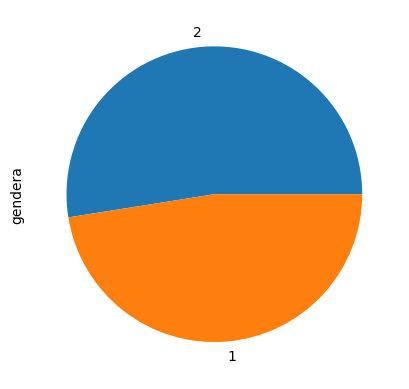

In [53]:
health_data['gendera'].value_counts().plot(kind='pie')

In [74]:
health_data.iloc[0:2, 0:6]

,group,ID,outcome,age,gendera,BMI
0,1,125047,0.0,72,1,37.588179
1,1,139812,0.0,75,2,NaN


In [99]:
health_data.loc[:, [ 'gendera', 'BMI']]

,gendera,BMI
0,1,37.588179
1,2,NaN
2,2,26.572634
3,2,83.264629
4,2,31.824842
...,...,...
1172,1,25.516870
1173,1,25.822710
1174,2,23.891779
1175,2,35.288554


In [106]:
gender_bmi = health_data.groupby('gendera')['BMI'].mean()
gender_bmi

gendera
1    29.956519
2    30.413388
Name: BMI, dtype: float64

In [107]:
# Testing out imputation
# impute_bmi = health_data['BMI'].fillna(health_data.groupby('gendera')['BMI'].mean())
# health_data_impute_bmi = health_data
# health_data_impute_bmi['BMI'] = impute_bmi
# health_data.loc[:, [ 'gendera', 'BMI']]

,gendera,BMI
0,1,37.588179
1,2,29.956519
2,2,26.572634
3,2,83.264629
4,2,31.824842
...,...,...
1172,1,25.516870
1173,1,25.822710
1174,2,23.891779
1175,2,35.288554


In [117]:
#dataframe['columnA'] = dataframe['columnA'].fillna(dataframe.groupby('columnB')['columnA'].mean())
# Impute BMI with gender medians
health_data['BMI'] = health_data['BMI'].fillna(health_data.groupby('gendera')['BMI'].median())
health_data

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900000,16.220000,7.650000,305.100000,74.65,0.40,13.30,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,29.956519,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200000,14.260000,12.740000,246.400000,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800000,23.820000,5.480000,204.200000,68.10,0.55,24.50,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625000,17.037500,8.225000,216.375000,81.80,0.15,14.50,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000000,16.266667,8.833333,251.000000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,0,1,1,1,0,100.125000,142.545455,69.681818,24.500000,37.055556,94.130435,NaN,33.628571,3.685714,27.842857,30.542857,91.142857,15.557143,7.742857,251.857143,81.55,0.70,10.65,12.600000,1.200000,47985.0,129.500000,8.385714,48.000000,120.000000,5.557143,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,0,1,1,1,0,114.640000,101.222222,51.888889,18.958333,35.972222,93.526316,NaN,28.715789,3.270000,29.772727,33.263636,89.545455,18.672727,22.309091,283.000000,84.58,0.80,7.70,18.721429,1.692857,48044.0,34.000000,1.900000,34.500000,138.333333,4.520000,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,1,0,0,1,0,52.720000,137.791667,40.958333,18.680000,36.777778,98.800000,118.0,27.685714,3.065714,26.900000,29.800000,90.285714,17.285714,9.228571,409.285714,65.90,0.40,24.40,13.000000,1.100000,50976.0,98.000000,2.728571,30.428571,99.000000,4.100000,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,1,1,1,1,0,93.400000,94.416667,62.458333,22.040000,36.422222,99.560000,2585.0,33.537500,3.446250,31.150000,32.012500,97.375000,16.000000,6.062500,307.375000,79.85,0.30,13.20,16.442857,1.485714,59701.0,24.333333,1.736364,35.500000,135.166667,4.091667,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [148]:
#Grouped filtration 
# find mean blood pressure, on ages when mean blood pressue was over 90
health_data_grouped = health_data.groupby('age')
filter_trans = lambda x : x['Diastolic blood pressure'].mean() > 75 
health_data_filtered = health_data_grouped.filter(filter_trans)
health_data_filtered['Diastolic blood pressure'].mean()


81.4149545853846